In [108]:
import pandas as pd 

In [109]:
data = pd.read_csv("sampleSubmission.csv")
train = pd.read_csv('train.tsv',sep='\t')
test = pd.read_csv('test.tsv',sep='\t')
data.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [110]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [111]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [112]:
data.isnull().sum(),train.isnull().sum(),test.isnull().sum()

(PhraseId     0
 Sentiment    0
 dtype: int64,
 PhraseId      0
 SentenceId    0
 Phrase        0
 Sentiment     0
 dtype: int64,
 PhraseId      0
 SentenceId    0
 Phrase        0
 dtype: int64)

In [113]:
data.columns, train.columns, test.columns

(Index(['PhraseId', 'Sentiment'], dtype='object'),
 Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object'),
 Index(['PhraseId', 'SentenceId', 'Phrase'], dtype='object'))

In [114]:
data.info(), train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PhraseId   66292 non-null  int64
 1   Sentiment  66292 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-n

(None, None, None)

In [115]:
data.shape, train.shape ,test.shape

((66292, 2), (156060, 4), (66292, 3))

In [116]:
train['Sentiment'].value_counts(normalize=True).sort_index()

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64

In [117]:
train['Sentiment'].value_counts(normalize=True).sort_values()

0    0.045316
4    0.058990
1    0.174760
3    0.210989
2    0.509945
Name: Sentiment, dtype: float64

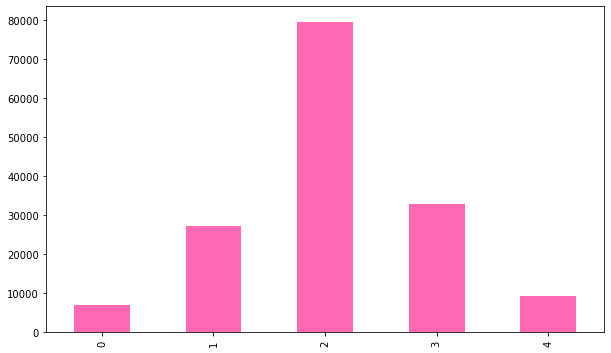

In [118]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
train['Sentiment'].value_counts().sort_index().plot(kind='bar',color='hotpink');

In [119]:
train_copy = train.copy(deep=True)


In [120]:
pie1 = pd.DataFrame(train_copy['Sentiment'].replace(0,'Negative').replace(1,'Little negative').replace(2,'Neutral').replace(3,'Little positive').replace(4,'Psitive').value_counts())
pie1


,Sentiment
Neutral,79582
Little positive,32927
Little negative,27273
Psitive,9206
Negative,7072


In [121]:
pie1.reset_index(inplace=True)
pie1

,index,Sentiment
0,Neutral,79582
1,Little positive,32927
2,Little negative,27273
3,Psitive,9206
4,Negative,7072


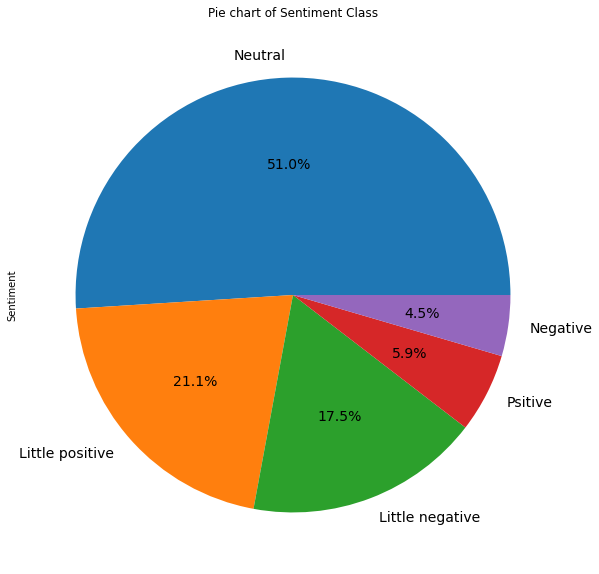

In [122]:
pie1.plot(kind='pie',y='Sentiment',figsize=(10,10),autopct='%1.1f%%',legend=False,
         labels=pie1['index'],fontsize=14,title='Pie chart of Sentiment Class');

In [123]:
train['Phrase'].sample(10)

80641                              with some hippie getting
61107                                       a decent budget
76193                                             responses
23927     artificial , ill-constructed and fatally overlong
130727            If it 's unnerving suspense you 're after
33075     If you 're not fans of the adventues of Steve ...
10130                                             cathartic
101368                                           Wilson and
68138                                           past decade
57839                                     my crappola radar
Name: Phrase, dtype: object

In [124]:
train[train['Sentiment'] == 0].Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [125]:
train[train['Sentiment'] == 1].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [126]:
train[train['Sentiment'] == 2].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [127]:
train[train['Sentiment'] == 3].Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [128]:
train[train['Sentiment'] == 4].Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [129]:
train.shape, test.shape

((156060, 4), (66292, 3))